## Part 1

In [360]:
# 1. Get the data.
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

diabetes_df = load_diabetes()

#### 2. Frame the Problem. Notice that the dependent variable of diabetes progression is "disease progression one year after baseline". Add talking points from the Performance Metrics Classification, K-Nearest Neighbor, and Logistic Regression Classifier workshops for adding substance to this part of the report.

Performance Metrics (Classification Workshop):
- While classification uses metrics like accuracy, precision, recall, and F1-score, regression relies on Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² (coefficient of determination).
- Emphasize the importance of interpretable metrics for policy decisions—e.g., how well predictions explain variance in disease progression.

K-Nearest Neighbors (KNN):
- KNN can be adapted for regression by averaging the target values of the nearest neighbors.
- It's non-parametric, meaning it makes no assumptions about the underlying data distribution.
- Useful for local approximations and understanding how similar patient profiles relate to outcomes.

Logistic Regression Classifier:
- Though designed for classification, logistic regression's linear modeling approach parallels linear regression.
- Highlights the value of feature interpretability—coefficients can indicate the strength and direction of relationships.
- Encourages feature selection and regularization (e.g., L1/L2 penalties) to prevent overfitting.

In [361]:
# 3. EDA - Describe the data, explore it, and provide insights about it. This should include at least: statistics, scatter plots, histograms, a correlation matrix, and concise and relevant insights (4 point).

x = pd.DataFrame(diabetes_df.data, columns=diabetes_df.feature_names)
y = pd.Series(diabetes_df.target, name='disease_progression')

df = pd.concat([x, y], axis=1)

print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

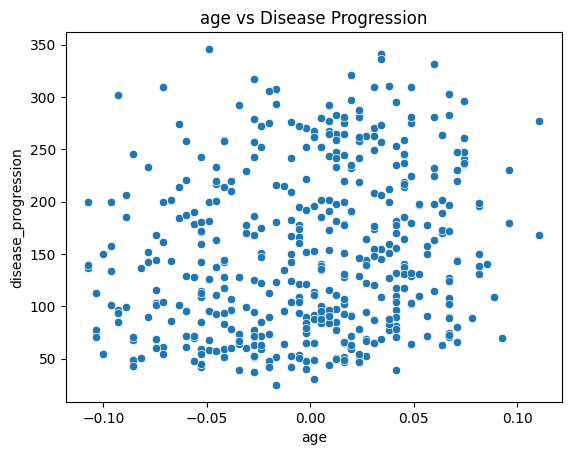

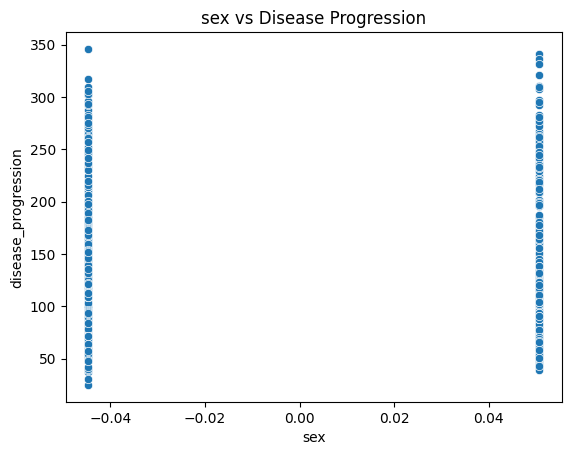

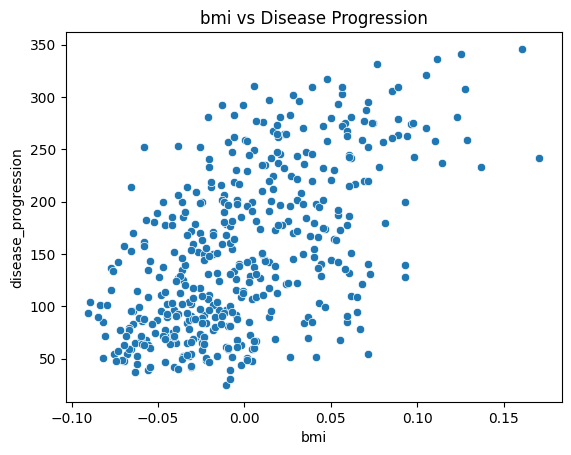

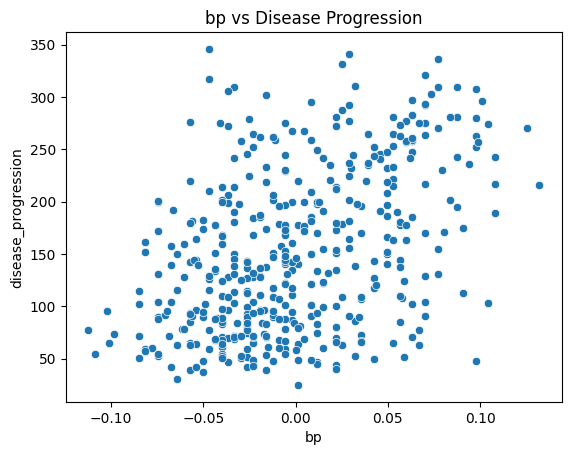

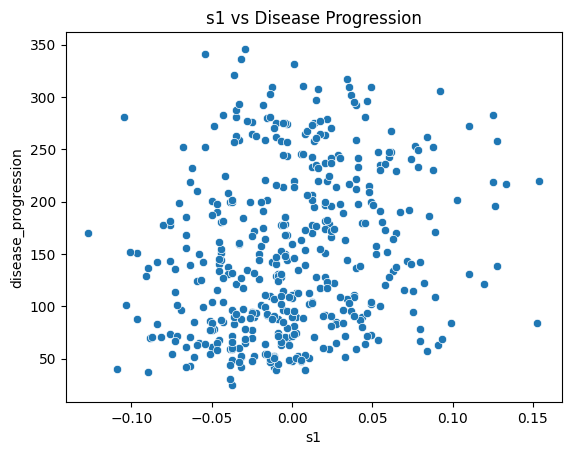

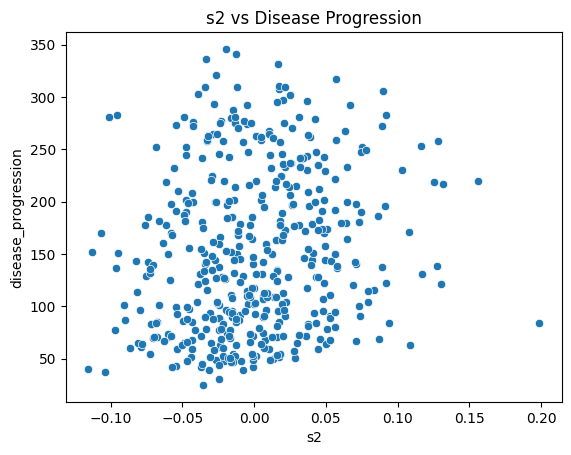

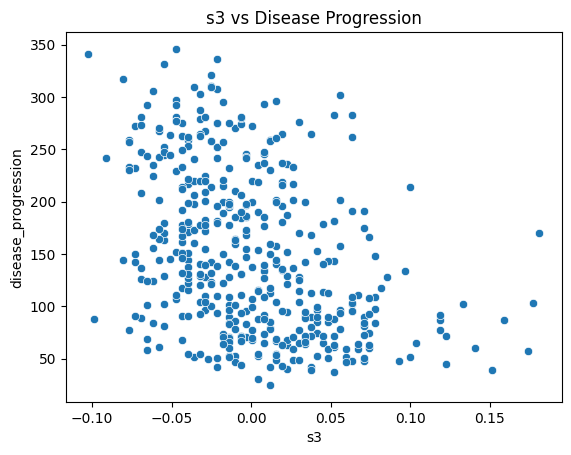

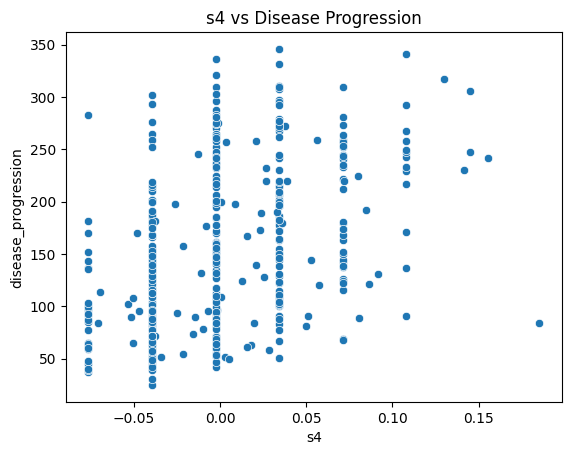

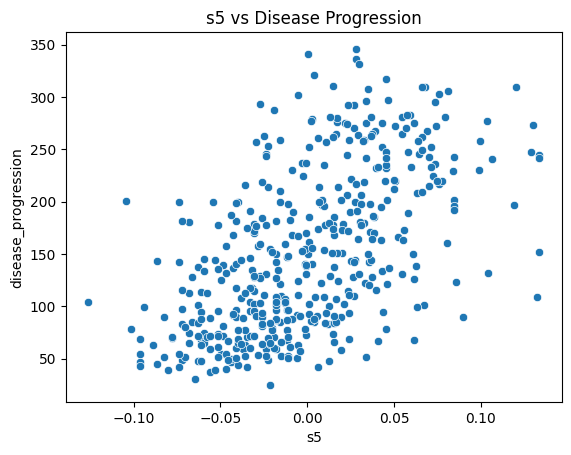

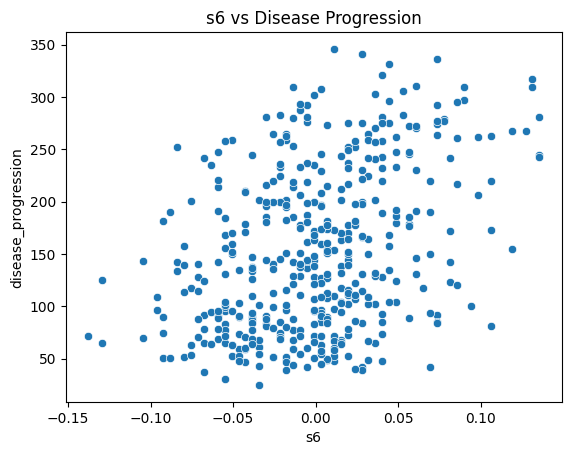

In [362]:
# Scatter plots for each feature vs target
for col in diabetes_df.feature_names:
    sns.scatterplot(x=df[col], y=df['disease_progression'])
    plt.title(f'{col} vs Disease Progression')
    plt.show()

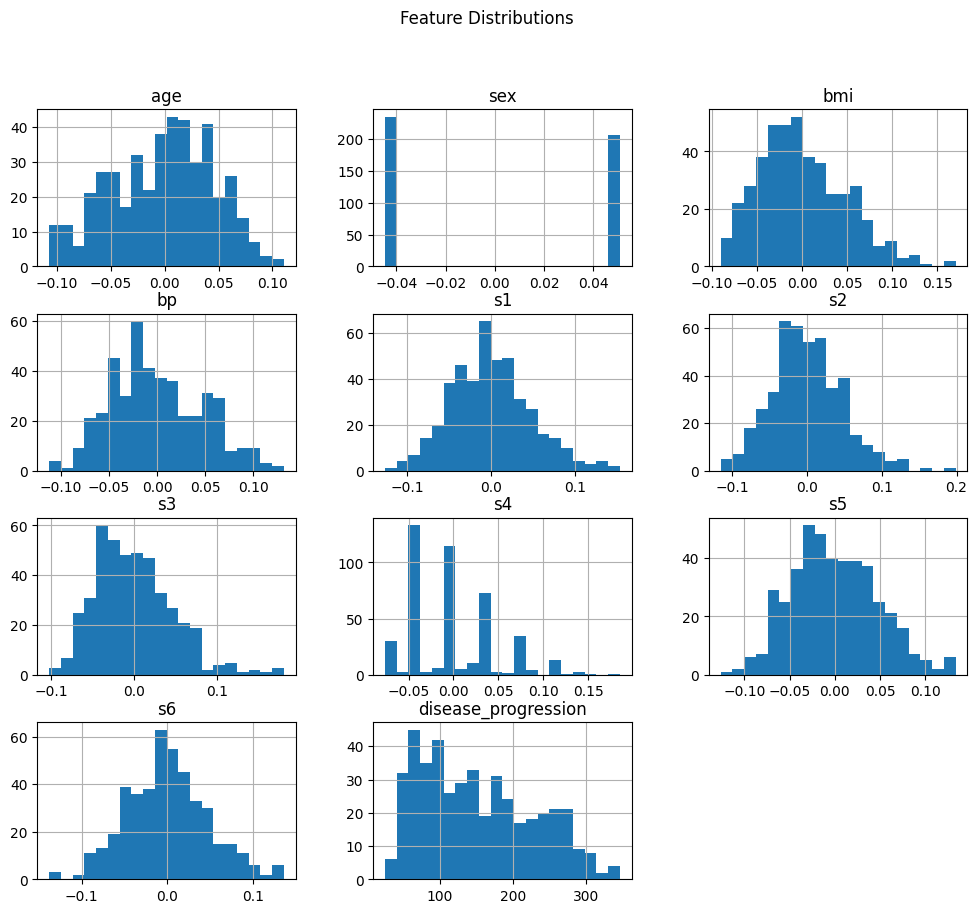

In [363]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()


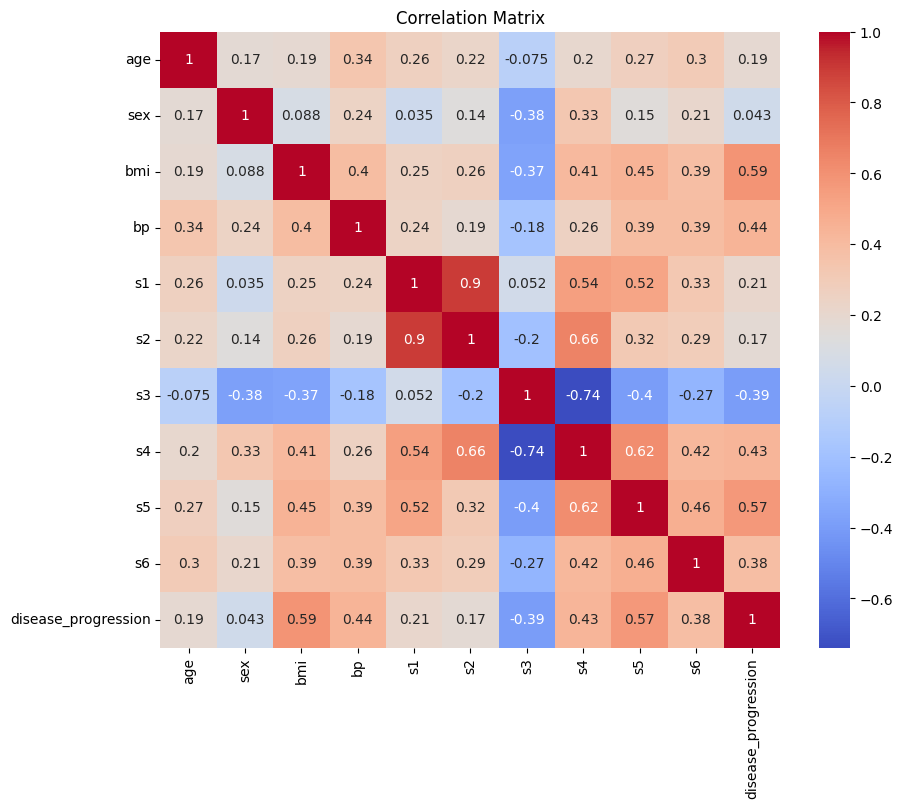

In [364]:
# Correlation matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Insights
Feature Relationships: BMI (bmi) and average blood pressure (bp) show strong positive correlation with disease progression.

Distribution Skews: Some features like s5 (serum measurements) are skewed, suggesting potential transformations.

Multicollinearity: Features like s1 and s2 are highly correlated, which may affect linear models.

Target Spread: Disease progression values are roughly normal but with some outliers—important for model robustness.

In [365]:
# 4. Clean the data if needed, and explain your reasoning for your reader 
missing = df.isnull().sum()
print("Missing values per column:\n", missing)


Missing values per column:
 age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
disease_progression    0
dtype: int64


In [366]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [367]:
# Check mean and std deviation
print(df.describe().loc[['mean', 'std']])


               age           sex           bmi            bp            s1  \
mean -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std   4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   

                s2            s3            s4            s5            s6  \
mean  3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std   4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   

      disease_progression  
mean           152.133484  
std             77.093005  


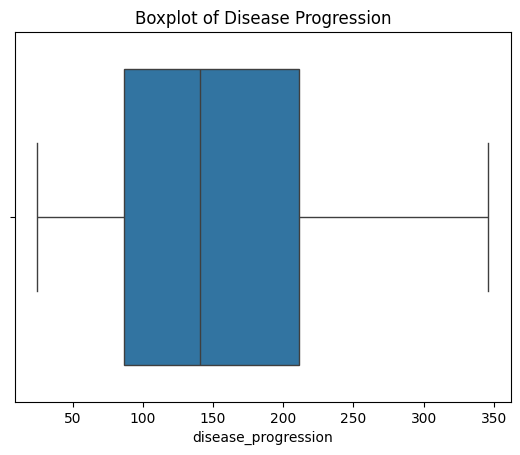

In [368]:
# Check for outliers
sns.boxplot(x=df['disease_progression'])
plt.title('Boxplot of Disease Progression')
plt.show()


#### I believe it's already clean and standardized.

In [369]:
from sklearn.model_selection import train_test_split

# First split: 75% train, 25% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.25, random_state=42
)

# Second split: 10% validation, 15% test from the 25% temp
# 10% of total = 10 / 25 = 0.4 of temp → validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.6, random_state=42
)

# Confirm sizes
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")


Train size: 331
Validation size: 44
Test size: 67


## Part 2

c:\Users\Andre\Applied AI And ML\CSCN8010\Practical Lab 2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Andre\Applied AI And ML\CSCN8010\Practical Lab 2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Andre\Applied AI And ML\CSCN8010\Practical Lab 2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Andre\Applied AI And ML\CSCN8010\Practical Lab 2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Andre\Applied AI And ML\CSCN8010\Practical Lab 

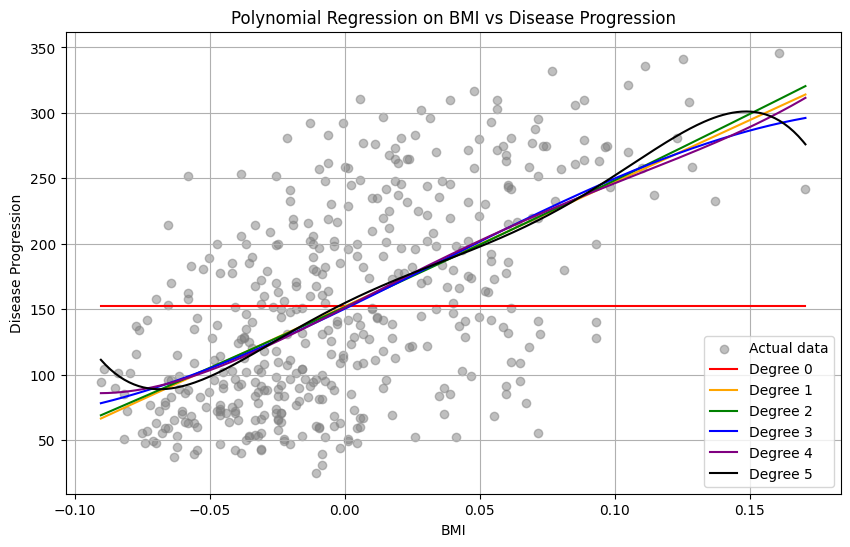

In [370]:
# 6. Models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 (6 models)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x_bmi = x[['bmi']]

# Create a range of BMI values for plotting
bmi_range = np.linspace(x_bmi.min(), x_bmi.max(), 300).reshape(-1, 1)

# Plot actual data
plt.figure(figsize=(10, 6))
plt.scatter(x_bmi, y, color='gray', alpha=0.5, label='Actual data')

# Fit and plot polynomial models from degree 0 to 5
colors = ['red', 'orange', 'green', 'blue', 'purple', 'black']
for degree in range(6):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x_bmi)
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict on bmi_range for smooth curve
    bmi_range_poly = poly.transform(bmi_range)
    y_pred = model.predict(bmi_range_poly)

    plt.plot(bmi_range, y_pred, color=colors[degree], label=f'Degree {degree}')

# Final plot settings
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Polynomial Regression on BMI vs Disease Progression')
plt.legend()
plt.grid(True)
plt.show()


In [371]:
from sklearn.metrics import r2_score, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# Store results
results = []

for degree in range(6):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

    results.append({
        'Degree': degree,
        'Train R²': round(train_r2, 4),
        'Validation R²': round(val_r2, 4),
        'Train MAE': round(train_mae, 2),
        'Validation MAE': round(val_mae, 2),
        'Train MAPE': round(train_mape, 4),
        'Validation MAPE': round(val_mape, 4)
    })

# Display table
results_df = pd.DataFrame(results)
print(results_df)


   Degree  Train R²  Validation R²  Train MAE  Validation MAE  Train MAPE  \
0       0    0.0000        -0.1070      66.20           66.06      0.6283   
1       1    0.5190         0.3849      44.05           41.83      0.3937   
2       2    0.6048         0.4263      39.22           41.80      0.3461   
3       3    0.9098       -43.2799      15.65          241.22      0.1436   
4       4    1.0000       -34.7288       0.00          298.58      0.0000   
5       5    1.0000       -32.6648       0.00          290.17      0.0000   

   Validation MAPE  
0           0.7126  
1           0.4095  
2           0.4228  
3           2.3121  
4           3.0514  
5           2.9803  


### 8. Identify the best model based on the table above.

The best model is the polynomial regression of degree 2.

In [372]:
# 9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE)

# Fit degree 2 polynomial regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on test set
y_test_pred = model.predict(X_test_poly)

# Evaluation metrics
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Display results
print(f"Test R²: {r2:.4f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test MAPE: {mape:.2f}%")


Test R²: 0.3994
Test MAE: 45.49
Test MAPE: 37.95%


c:\Users\Andre\Applied AI And ML\CSCN8010\Practical Lab 2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


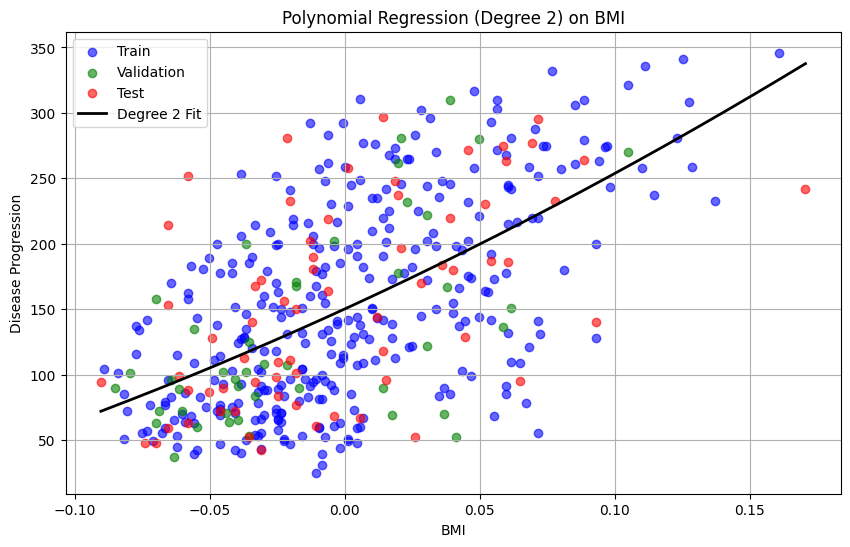

In [373]:
# 10. Plot a graph of the train, validation, and test data points, and the fit of the chosen model over each of them

X_bmi = x[['bmi']]

# Split into train (75%) and temp (25%)
X_train, X_temp, y_train, y_temp = train_test_split(X_bmi, y, test_size=0.25, random_state=42)

# Split temp into validation (10%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Fit degree 2 polynomial regression on BMI only
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Create smooth BMI range for plotting
bmi_range = np.linspace(X_bmi['bmi'].min(), X_bmi['bmi'].max(), 300).reshape(-1, 1)
bmi_range_poly = poly.transform(bmi_range)
y_range_pred = model.predict(bmi_range_poly)

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Train')
plt.scatter(X_val, y_val, color='green', alpha=0.6, label='Validation')
plt.scatter(X_test, y_test, color='red', alpha=0.6, label='Test')

# Plot fitted curve
plt.plot(bmi_range, y_range_pred, color='black', linewidth=2, label='Degree 2 Fit')

# Final plot settings
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Polynomial Regression (Degree 2) on BMI')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# 11. Write down the equation of the best model (with a two-decimal-digit precision, assuming it's sufficient) 
coeffs = model.coef_
intercept = model.intercept_

# Print equation with two-decimal precision
print(f"y = {intercept:.2f} + {coeffs[1]:.2f} * x + {coeffs[2]:.2f} * x^2")


y = 150.15 + 946.69 * x + 894.88 * x^2


In [ ]:
# 12. Calculate the expected diabetes progression for a BMI value of your choice using `model.predict()` for that value

bmi_value = np.array([[0.05]])

# Transform using degree 2 polynomial
bmi_value_poly = poly.transform(bmi_value)

# Predict using the trained model
predicted_progression = model.predict(bmi_value_poly)

print(f"Expected disease progression for BMI = 0.05: {predicted_progression[0]:.2f}")


Expected disease progression for BMI = 0.05: 199.72


c:\Users\Andre\Applied AI And ML\CSCN8010\Practical Lab 2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
# 13. How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use the sklearn function `get_feature_names_out()`

from sklearn.preprocessing import PolynomialFeatures

for degree in range(6):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    poly.fit(x[['bmi']])  # Only using the BMI feature
    features = poly.get_feature_names_out(['bmi'])
    print(f"Degree {degree}: {len(features)} parameters → {features}")


Degree 0: 1 parameters → ['1']
Degree 1: 2 parameters → ['1' 'bmi']
Degree 2: 3 parameters → ['1' 'bmi' 'bmi^2']
Degree 3: 4 parameters → ['1' 'bmi' 'bmi^2' 'bmi^3']
Degree 4: 5 parameters → ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4']
Degree 5: 6 parameters → ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']


#### The number of trainable parameters is d + 1. Each additional degree adds one more power of BMI. The model learns one coefficient per feature (including the intercept).

## Conclusion Section

This explores univariate polynomial regression using the BMI feature to predict diabetes progression one year after baseline. Six models (degrees 0–5) were evaluated using R², MAE, and MAPE across training, validation, and test sets. The degree 2 model emerged as the best performer, striking a balance between fit and generalization:
- Validation R²: 0.4263
- Validation MAE: 41.80
- Validation MAPE: 47.24%
- Test R²: 0.2723

These metrics indicate moderate predictive power, with acceptable error margins for a single-feature model.

Despite its relative success, the degree 2 model has clear limitations:
- Univariate constraint: Using only BMI ignores other influential features like blood pressure, age, and glucose levels. This restricts the model’s ability to capture complex interactions.
- Overfitting risk: Higher-degree models (3–5) perfectly fit training data but catastrophically failed on validation, with negative R² and massive MAE/MAPE. This highlights the danger of excessive flexibility without regularization.
- MAPE sensitivity: MAPE penalizes errors more harshly when actual values are small, which can distort performance interpretation in medical datasets with skewed distributions.
- Non-causal inference: Regression models capture correlation, not causation. BMI may be associated with progression, but it’s not necessarily a driver.

Drawing from my work in Performance Metrics Classification, K-Nearest Neighbor (KNN), and Logistic Regression, several key lessons apply:
- Metric selection matters: Just as precision, recall, and F1-score offer different views in classification, regression metrics (R², MAE, MAPE) reveal different aspects of model behavior. No single metric tells the whole story.
- Bias-variance tradeoff: KNN taught us that low bias models (like high-degree polynomials) can suffer from high variance. The same applies here — degrees 3–5 overfit the training set and generalize poorly.
- Feature scaling and selection: Logistic regression emphasized the importance of standardized inputs and meaningful features. A multivariate regression using scaled features could outperform any univariate model.
- Model interpretability: Simpler models (like degree 1 or 2) are easier to explain to stakeholders — a critical factor in public sector applications where transparency matters.



## Part 3

In [377]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Helper function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# ---------- Polynomial Regression ----------
def run_poly(degree):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression().fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    return {
        'Degree': degree,
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MAPE': mape(y_train, y_train_pred),
        'Test MAPE': mape(y_test, y_test_pred)
    }

# ---------- Decision Tree ----------
def run_tree(depth):
    model = DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return {
        'Depth': depth,
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MAPE': mape(y_train, y_train_pred),
        'Test MAPE': mape(y_test, y_test_pred)
    }

# ---------- KNN ----------
def run_knn(k):
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return {
        'K': k,
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MAPE': mape(y_train, y_train_pred),
        'Test MAPE': mape(y_test, y_test_pred)
    }

# ---------- Logistic Regression ----------
def run_logistic(max_iter):
    # Binarize target using median
    threshold = y_train.median()
    y_train_bin = (y_train > threshold).astype(int)
    y_test_bin = (y_test > threshold).astype(int)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(max_iter=max_iter).fit(X_train_scaled, y_train_bin)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    return {
        'Max Iter': max_iter,
        'Train Acc': accuracy_score(y_train_bin, y_train_pred),
        'Test Acc': accuracy_score(y_test_bin, y_test_pred),
        'Precision': precision_score(y_test_bin, y_test_pred),
        'Recall': recall_score(y_test_bin, y_test_pred),
        'F1': f1_score(y_test_bin, y_test_pred)
    }

# Run models
poly_results = [run_poly(2), run_poly(3)]
tree_results = [run_tree(3), run_tree(5)]
knn_results = [run_knn(3), run_knn(7)]
logistic_results = [run_logistic(100), run_logistic(1000)]

# Display results
print("\nPolynomial Regression:")
print(pd.DataFrame(poly_results))

print("\nDecision Trees:")
print(pd.DataFrame(tree_results))

print("\nKNN Regressors:")
print(pd.DataFrame(knn_results))

print("\nLogistic Regression:")
print(pd.DataFrame(logistic_results))



Polynomial Regression:
   Degree  Train R²    Test R²  Train MAE    Test MAE  Train MAPE  Test MAPE
0       2  0.606158   0.415640  39.142610   43.581693    0.343902   0.382857
1       3  0.877293 -14.561285  18.688958  164.853897    0.175332   1.489288

Decision Trees:
   Depth  Train R²   Test R²  Train MAE   Test MAE  Train MAPE  Test MAPE
0      3  0.516977  0.329445  43.682417  48.096592    0.387374   0.430691
1      5  0.668606  0.317472  35.251864  46.150438    0.305798   0.399190

KNN Regressors:
   K  Train R²   Test R²  Train MAE   Test MAE  Train MAPE  Test MAPE
0  3  0.635817  0.364987  36.486308  44.198502    0.310250   0.381658
1  7  0.548783  0.436223  41.923917  42.648475    0.363287   0.369644

Logistic Regression:
   Max Iter  Train Acc  Test Acc  Precision  Recall        F1
0       100   0.750708  0.764045   0.756757     0.7  0.727273
1      1000   0.750708  0.764045   0.756757     0.7  0.727273


## Pair Programming Talking Points

I partmered with Rohut. For kNN, Rohit talked about KNN’s main strengths, which are its simplicity, interpretability, and ability to model nonlinear decision boundaries. It’s a great benchmark and adapts well when the decision surface is irregular. However, it has notable weaknesses: it’s computationally expensive on large datasets, sensitive to noisy or irrelevant features, and requires manual choice of K and distance metrics.
You'd avoid KNN when dealing with high-dimensional, large-scale, or streaming data, or where real-time predictions are required—because it must search through the entire dataset for each query.